In [140]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
%matplotlib inline

In [141]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np 
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [175]:
df =pd.read_csv('../datasets/fifa_eda.csv')


In [176]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


In [177]:
nan=df['International Reputation'].isnull()
data=df[nan]
data=data[['Age','Potential','Overall','Skill Moves','Height','Weight']]

In [145]:
df=df.dropna()

In [146]:
X=df[['Age','Potential','Overall','Skill Moves','Height','Weight']]

In [147]:
Y=df['International Reputation']

In [148]:
classes=Y.unique()

In [149]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

In [150]:
preprocessor=ColumnTransformer( 
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [151]:
pipeline=Pipeline([('preprocess',preprocessor),('classifer',DecisionTreeClassifier())])

In [152]:
xtr,xte,ytr,yte=train_test_split(X,Y,train_size=0.33,random_state=42)

In [153]:
pipeline.fit(xtr,ytr)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Potential', 'Overall', 'Skill Moves', 'Height', 'Weight'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index([], dtype='object'))])),
                ('classifer', DecisionTreeClassifier())])

In [154]:
yp=pipeline.predict(xte)

In [155]:
accuracy_score(yp,yte)

0.8989831638606435

In [156]:
print(confusion_matrix(yp,yte))

[[10361   400    27     1     0]
 [  522   324    69     4     0]
 [   45   100    91    25     0]
 [    1     3     6    10     3]
 [    0     2     4     0     0]]


In [157]:
print(classification_report(yp,yte))

              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95     10789
         2.0       0.39      0.35      0.37       919
         3.0       0.46      0.35      0.40       261
         4.0       0.25      0.43      0.32        23
         5.0       0.00      0.00      0.00         6

    accuracy                           0.90     11998
   macro avg       0.41      0.42      0.41     11998
weighted avg       0.89      0.90      0.90     11998



[Text(0.5384915541611206, 0.9772727272727273, 'x[2] <= 1.347\ngini = 0.169\nsamples = 5909\nvalue = [5369, 416, 110, 11, 3]'),
 Text(0.24641091462255182, 0.9318181818181818, 'x[2] <= 0.774\ngini = 0.07\nsamples = 5415\nvalue = [5218.0, 189.0, 8.0, 0.0, 0.0]'),
 Text(0.3924512343918362, 0.9545454545454546, 'True  '),
 Text(0.11695030740952018, 0.8863636363636364, 'x[0] <= 1.384\ngini = 0.025\nsamples = 4633\nvalue = [4575, 57, 1, 0, 0]'),
 Text(0.051087025416745896, 0.8409090909090909, 'x[0] <= 0.955\ngini = 0.011\nsamples = 4249\nvalue = [4226, 23, 0, 0, 0]'),
 Text(0.022437725803384673, 0.7954545454545454, 'x[2] <= 0.487\ngini = 0.005\nsamples = 3899\nvalue = [3889, 10, 0, 0, 0]'),
 Text(0.006084806997528047, 0.75, 'x[0] <= 0.098\ngini = 0.001\nsamples = 3524\nvalue = [3522, 2, 0, 0, 0]'),
 Text(0.004056537998352031, 0.7045454545454546, 'gini = 0.0\nsamples = 2693\nvalue = [2693, 0, 0, 0, 0]'),
 Text(0.008113075996704062, 0.7045454545454546, 'x[1] <= -0.128\ngini = 0.005\nsamples = 83

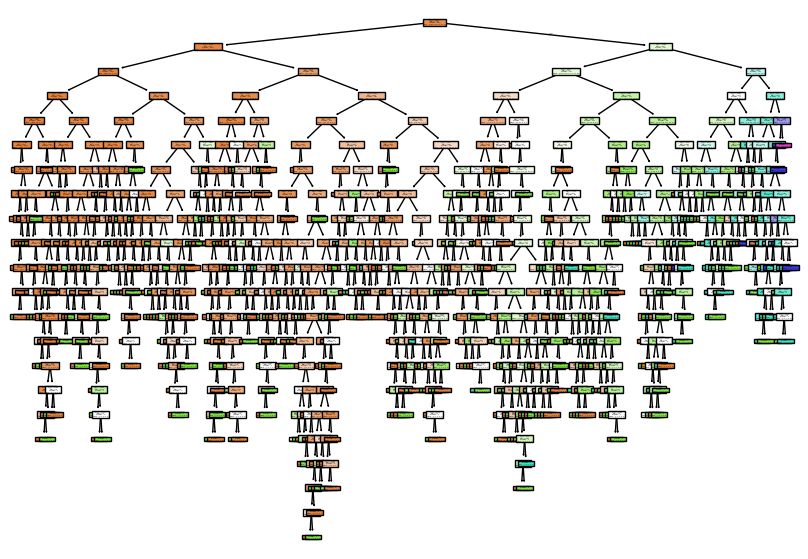

In [158]:
plt.figure(figsize=(10,7))
plot_tree(pipeline['classifer'],filled=True)


In [159]:
#prepruning

In [160]:
parameters={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':list(range(3, 12)),
    'min_samples_split':[2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [161]:
cv=GridSearchCV(pipeline.named_steps['classifer'],param_grid=parameters,cv=5,scoring='accuracy')

In [162]:
xtr_preprocessed=pipeline.named_steps['preprocess'].fit_transform(xtr)
xte_preprocessed=pipeline.named_steps['preprocess'].transform(xte)

In [163]:
cv.fit(xtr_preprocessed,ytr)

c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [164]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_split': 3,
 'splitter': 'best'}

In [165]:
ypred=cv.predict(xte_preprocessed)

In [166]:
accuracy_score(ypred,yte)

0.9241540256709452

In [167]:
best_model=cv.best_estimator_

In [168]:
yp_best=best_model.predict(xte_preprocessed)

In [169]:
accuracy_score(yp_best,yte)

0.9241540256709452

[Text(0.5, 0.9, 'x[2] <= 1.347\ngini = 0.169\nsamples = 5909\nvalue = [5369, 416, 110, 11, 3]'),
 Text(0.25, 0.7, 'x[2] <= 0.774\ngini = 0.07\nsamples = 5415\nvalue = [5218.0, 189.0, 8.0, 0.0, 0.0]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[1] <= 0.037\ngini = 0.025\nsamples = 4633\nvalue = [4575, 57, 1, 0, 0]'),
 Text(0.0625, 0.3, 'x[1] <= -0.621\ngini = 0.035\nsamples = 3161\nvalue = [3104, 56, 1, 0, 0]'),
 Text(0.03125, 0.1, 'gini = 0.016\nsamples = 1645\nvalue = [1632.0, 13.0, 0.0, 0.0, 0.0]'),
 Text(0.09375, 0.1, 'gini = 0.056\nsamples = 1516\nvalue = [1472, 43, 1, 0, 0]'),
 Text(0.1875, 0.3, 'x[3] <= 0.192\ngini = 0.001\nsamples = 1472\nvalue = [1471, 1, 0, 0, 0]'),
 Text(0.15625, 0.1, 'gini = 0.0\nsamples = 786\nvalue = [786, 0, 0, 0, 0]'),
 Text(0.21875, 0.1, 'gini = 0.003\nsamples = 686\nvalue = [685, 1, 0, 0, 0]'),
 Text(0.375, 0.5, 'x[0] <= 0.526\ngini = 0.295\nsamples = 782\nvalue = [643, 132, 7, 0, 0]'),
 Text(0.3125, 0.3, 'x[1] <= 1.846\ngini = 0.138\nsamples = 

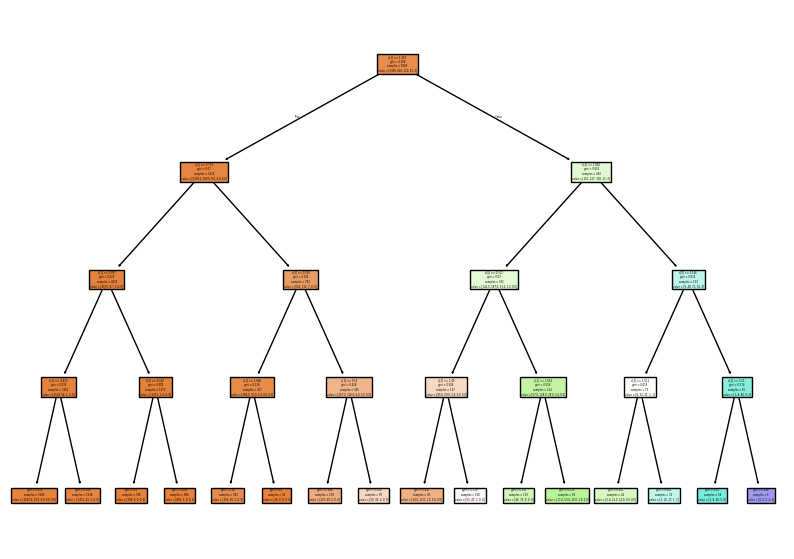

In [170]:
plt.figure(figsize=(10,7))
plot_tree(best_model,filled=True)


In [171]:
print(classification_report(yp_best,yte))

              precision    recall  f1-score   support

         1.0       0.98      0.95      0.97     11291
         2.0       0.29      0.49      0.36       491
         3.0       0.47      0.44      0.45       208
         4.0       0.12      0.62      0.21         8
         5.0       0.00      0.00      0.00         0

    accuracy                           0.92     11998
   macro avg       0.37      0.50      0.40     11998
weighted avg       0.95      0.92      0.93     11998



c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [172]:
print(confusion_matrix(yp_best,yte))

[[10751   519    21     0     0]
 [  163   240    83     5     0]
 [   15    70    92    30     1]
 [    0     0     1     5     2]
 [    0     0     0     0     0]]


<Axes: >

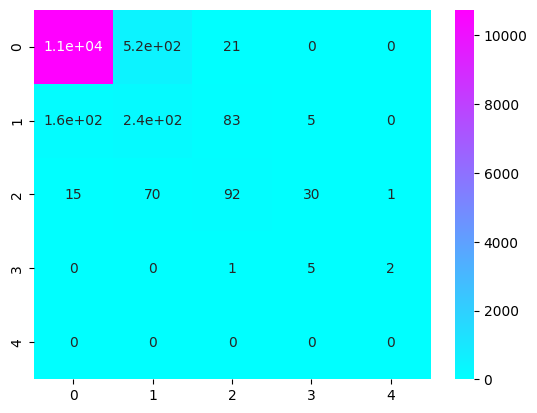

In [173]:
sns.heatmap(confusion_matrix(yp_best,yte),annot=True,cmap='cool')

In [191]:
data_preprocess=pipeline.named_steps['preprocess'].transform(data)

In [194]:
y_pred_data=best_model.predict(data_preprocess)

In [195]:
y_pred_data

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [181]:
test_d=df[df['International Reputation']==1.]

In [182]:
x_test=test_d[['Age','Potential','Overall','Skill Moves','Height','Weight']]
y_test=test_d['International Reputation']

In [187]:
x_test_preprocessed=pipeline.named_steps['preprocess'].transform(x_test)


In [188]:
y_pred_test=best_model.predict(x_test_preprocessed)

In [196]:
print(y_pred_test)

[2. 3. 2. ... 1. 1. 1.]


In [189]:
accuracy_score(y_pred_test,y_test)

0.9851197677232035